# Converting ATN netCDF file to Dawrin Core

The IOOS notebook
[environment](https://github.com/ioos/notebooks_demos/blob/229dabe0e7dd207814b9cfb96e024d3138f19abf/environment.yml#L73-L76)
installs the `R` language and the `Jupyter` kernel needed to run `R` notebooks.
Conda can also install extra `R` packages,
and those packages that are unavailable in `conda` can be installed directly from CRAN with `install.packages(pkg_name)`. This notebook uses the library `r-tidync` which can be installed via conda as shown below:

```
conda install r-tidync
```

You can start `jupyter` from any other environment and change the kernel later using the drop-down menu.
(Check the `R` logo at the top right to ensure you are in the `R` jupyter kernel.)

In this simple example we will use two libraries aimed at the oceanography community written in `R`: tidync, RNetCDF, and netcdf4

R blog on tidync: [https://ropensci.org/blog/2019/11/05/tidync/](https://ropensci.org/blog/2019/11/05/tidync/)

In [1]:
library(tidync)

**Caution** This notebook uses an example file for testing purposes. The data contained in the file are **not real**, they are within normal bounds to give a perspective of what the observations could look like.

In [2]:
url = 'https://github.com/ioos/ioos-atn-data/raw/main/data/atn_trajectory_template_20211006.nc'
download.file(url, 'atn_trajectory_template.nc', mode = "wb")

In [3]:
atn <- tidync("atn_trajectory_template.nc")
atn


Data Source (1): atn_trajectory_template.nc ...

Grids (3) <dimension family> : <associated variables> 

[1]   D0 : time, z, lat, lon, deploy_id, Ptt, instrument, type, location_class, error_radius, semi_major_axis, semi_minor_axis, ellipse_orientation, offset, offset_orientation, gpe_msd, gpe_u, count, comment, time_axds_valid_range_test, argo_speed_test, qartod_location_test, qartod_rollup_qc, qartod_rollup_flag, qartod_speed_flag, qartod_location_flag, qartod_time_flag    **ACTIVE GRID** ( 2216  values per variable)
[2]   D1 : animal, taxon_name, taxon_lsid
[3]   S  : trajectory, crs, instrument_location, instrument_tag

Dimensions 2 (1 active): 
  
  dim   name  length   min   max start count  dmin  dmax unlim coord_dim 
  <chr> <chr>  <dbl> <dbl> <dbl> <int> <int> <dbl> <dbl> <lgl> <lgl>     
1 D0    obs     2216     1  2216     1  2216     1  2216 FALSE FALSE     
  
Inactive dimensions:
  
  dim   name   length   min   max unlim coord_dim 
  <chr> <chr>   <dbl> <dbl> <dbl> <lgl

Collect all the metadata from the netCDF file.

In [4]:
metadata <- ncmeta::nc_atts("atn_trajectory_template.nc")
metadata

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,cf_role,trajectory,trajectory_id
1,long_name,trajectory,trajectory identifier
0,_FillValue,time,-9999.9
1,units,time,seconds since 1990-01-01 00:00:00Z
2,standard_name,time,time
3,axis,time,T
4,_CoordinateAxisType,time,Time
5,calendar,time,standard
6,actual_min,time,2020-01-30T15:05:34Z


To give you an idea of what observations are in this file, we can print out the human readable `long_name` attribute from all the variables.

In [5]:
metadata %>% dplyr::filter(name == "long_name")

id,name,variable,value
<int>,<chr>,<chr>,<named list>
1,long_name,trajectory,trajectory identifier
9,long_name,time,"Time of the measurement, in seconds since 1990-01-01"
9,long_name,z,depth of measurement
12,long_name,lat,Profile latitude Location in decimal degrees North
12,long_name,lon,Profile longitude Location in decimal degrees East
3,long_name,deploy_id,id for this deployment. This is typically the tag ptt
1,long_name,instrument,Instrument
2,long_name,type,Type of location information - Argos satellite location
8,long_name,location_class,Location Quality Code from ARGOS satellite system


Collect the data dimensioned by `time` from the netCDF file as a tibble.

In [6]:
atn_tbl <- atn %>% hyper_tibble()

[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am return

In [7]:
atn_tbl

time,z,lat,lon,deploy_id,Ptt,instrument,type,location_class,error_radius,⋯,comment,time_axds_valid_range_test,argo_speed_test,qartod_location_test,qartod_rollup_qc,qartod_rollup_flag,qartod_speed_flag,qartod_location_flag,qartod_time_flag,obs
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
949244734,0,41.3899,-70.0309,195533,195533,UT,Argos,B,NA,⋯,nan,4,2,1,4,0,0,0,0,1
949245216,0,41.3972,-70.0302,195533,195533,UT,Argos,1,607,⋯,nan,4,1,1,4,0,0,0,0,2
949246286,0,41.3940,-70.0313,195533,195533,UT,Argos,0,1689,⋯,nan,4,1,1,4,0,0,0,0,3
949247537,0,41.3995,-69.9917,195533,195533,UT,Argos,A,398,⋯,nan,4,1,1,4,0,0,0,0,4
949267374,0,41.3416,-69.8560,195533,195533,UT,Argos,0,1555,⋯,nan,4,1,1,4,0,0,0,0,5
949270917,0,41.3103,-69.8707,195533,195533,UT,Argos,B,2818,⋯,nan,4,1,1,4,0,0,0,0,6
949270917,0,41.3082,-69.8755,195533,195533,UT,Argos,B,2650,⋯,nan,4,4,1,4,0,0,0,0,7
949274174,0,41.2992,-69.8729,195533,195533,UT,Argos,B,4062,⋯,nan,4,1,1,4,0,0,0,0,8
949276943,0,41.2904,-69.8699,195533,195533,UT,Argos,B,1626,⋯,nan,4,1,1,4,0,0,0,0,9


Notice the data in the **time** column aren't formatted as times. We need to read the metadata associated with the time variable to understand what the units are. Below, we print a tibble of all the attributes from the **time** variable.

Notice the _units_ attribute and it's value of `seconds since 1990-01-01 00:00:00Z`. We need to use that information to convert the time variable to something useful that `ggplot` can handle.

In [8]:
time_attrs <- metadata %>% dplyr::filter(variable == "time")
time_attrs

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,_FillValue,time,-9999.9
1,units,time,seconds since 1990-01-01 00:00:00Z
2,standard_name,time,time
3,axis,time,T
4,_CoordinateAxisType,time,Time
5,calendar,time,standard
6,actual_min,time,2020-01-30T15:05:34Z
7,actual_max,time,2020-06-15T23:16:37Z
8,ancillary_variables,time,qartod_time_flag qartod_rollup_flag qartod_speed_flag


So, we grab the value from the `units` attribute, split the string to collect the date information, and apply that to a time conversion function `as.POSIXct`.

In [9]:
library(stringr)
# grab origin date from time variable units attribute
tunit <- time_attrs %>% dplyr::filter(name == "units")
lunit <- str_split(tunit$value,' ')[[1]]
atn_tbl$time <- as.POSIXct(atn_tbl$time, origin=lunit[3], tz="GMT")

atn_tbl

time,z,lat,lon,deploy_id,Ptt,instrument,type,location_class,error_radius,⋯,comment,time_axds_valid_range_test,argo_speed_test,qartod_location_test,qartod_rollup_qc,qartod_rollup_flag,qartod_speed_flag,qartod_location_flag,qartod_time_flag,obs
<dttm>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2020-01-30 15:05:34,0,41.3899,-70.0309,195533,195533,UT,Argos,B,NA,⋯,nan,4,2,1,4,0,0,0,0,1
2020-01-30 15:13:36,0,41.3972,-70.0302,195533,195533,UT,Argos,1,607,⋯,nan,4,1,1,4,0,0,0,0,2
2020-01-30 15:31:26,0,41.3940,-70.0313,195533,195533,UT,Argos,0,1689,⋯,nan,4,1,1,4,0,0,0,0,3
2020-01-30 15:52:17,0,41.3995,-69.9917,195533,195533,UT,Argos,A,398,⋯,nan,4,1,1,4,0,0,0,0,4
2020-01-30 21:22:54,0,41.3416,-69.8560,195533,195533,UT,Argos,0,1555,⋯,nan,4,1,1,4,0,0,0,0,5
2020-01-30 22:21:57,0,41.3103,-69.8707,195533,195533,UT,Argos,B,2818,⋯,nan,4,1,1,4,0,0,0,0,6
2020-01-30 22:21:57,0,41.3082,-69.8755,195533,195533,UT,Argos,B,2650,⋯,nan,4,4,1,4,0,0,0,0,7
2020-01-30 23:16:14,0,41.2992,-69.8729,195533,195533,UT,Argos,B,4062,⋯,nan,4,1,1,4,0,0,0,0,8
2020-01-31 00:02:23,0,41.2904,-69.8699,195533,195533,UT,Argos,B,1626,⋯,nan,4,1,1,4,0,0,0,0,9


Now lets make some plots just to take a look at what data we're working with.

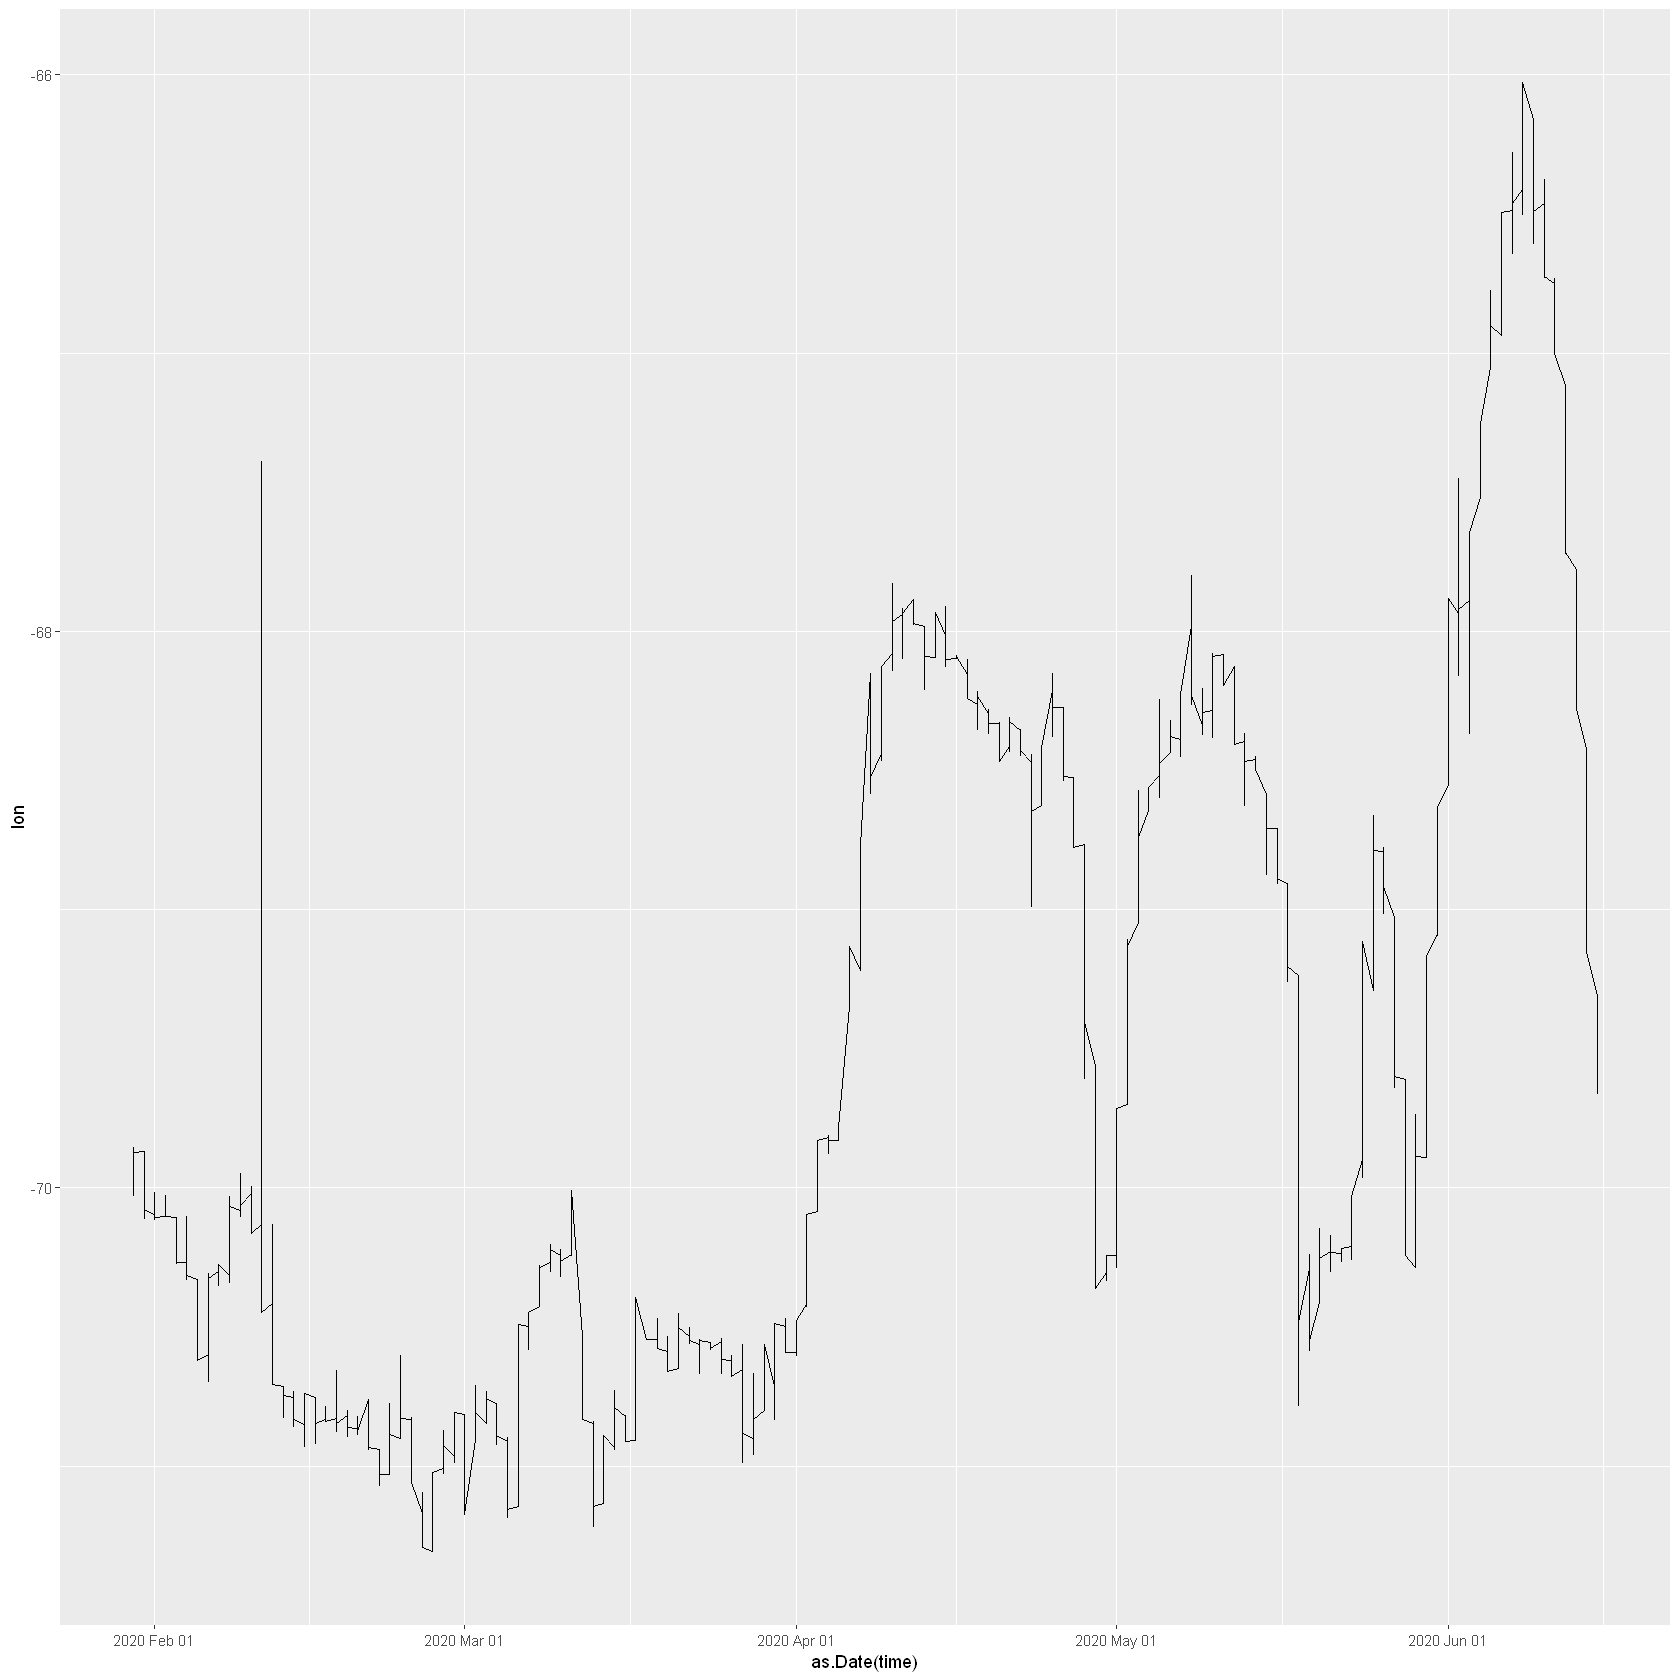

In [10]:
library(ggplot2)
options(repr.plot.width = 14, repr.plot.height = 14)

# grab origin date from time variable units attribute
#tunit <- ncmeta::nc_atts("atn_trajectory_template.nc" , "time") %>% dplyr::filter(name == "units")
#lunit <- str_split(tunit$value,' ')[[1]]

ggplot(atn_tbl, aes(x=as.Date(time), y=lon)) + 
geom_line() + 
scale_x_date(date_labels = "%Y %b %d")

Let's make a map of the locations of this animal.

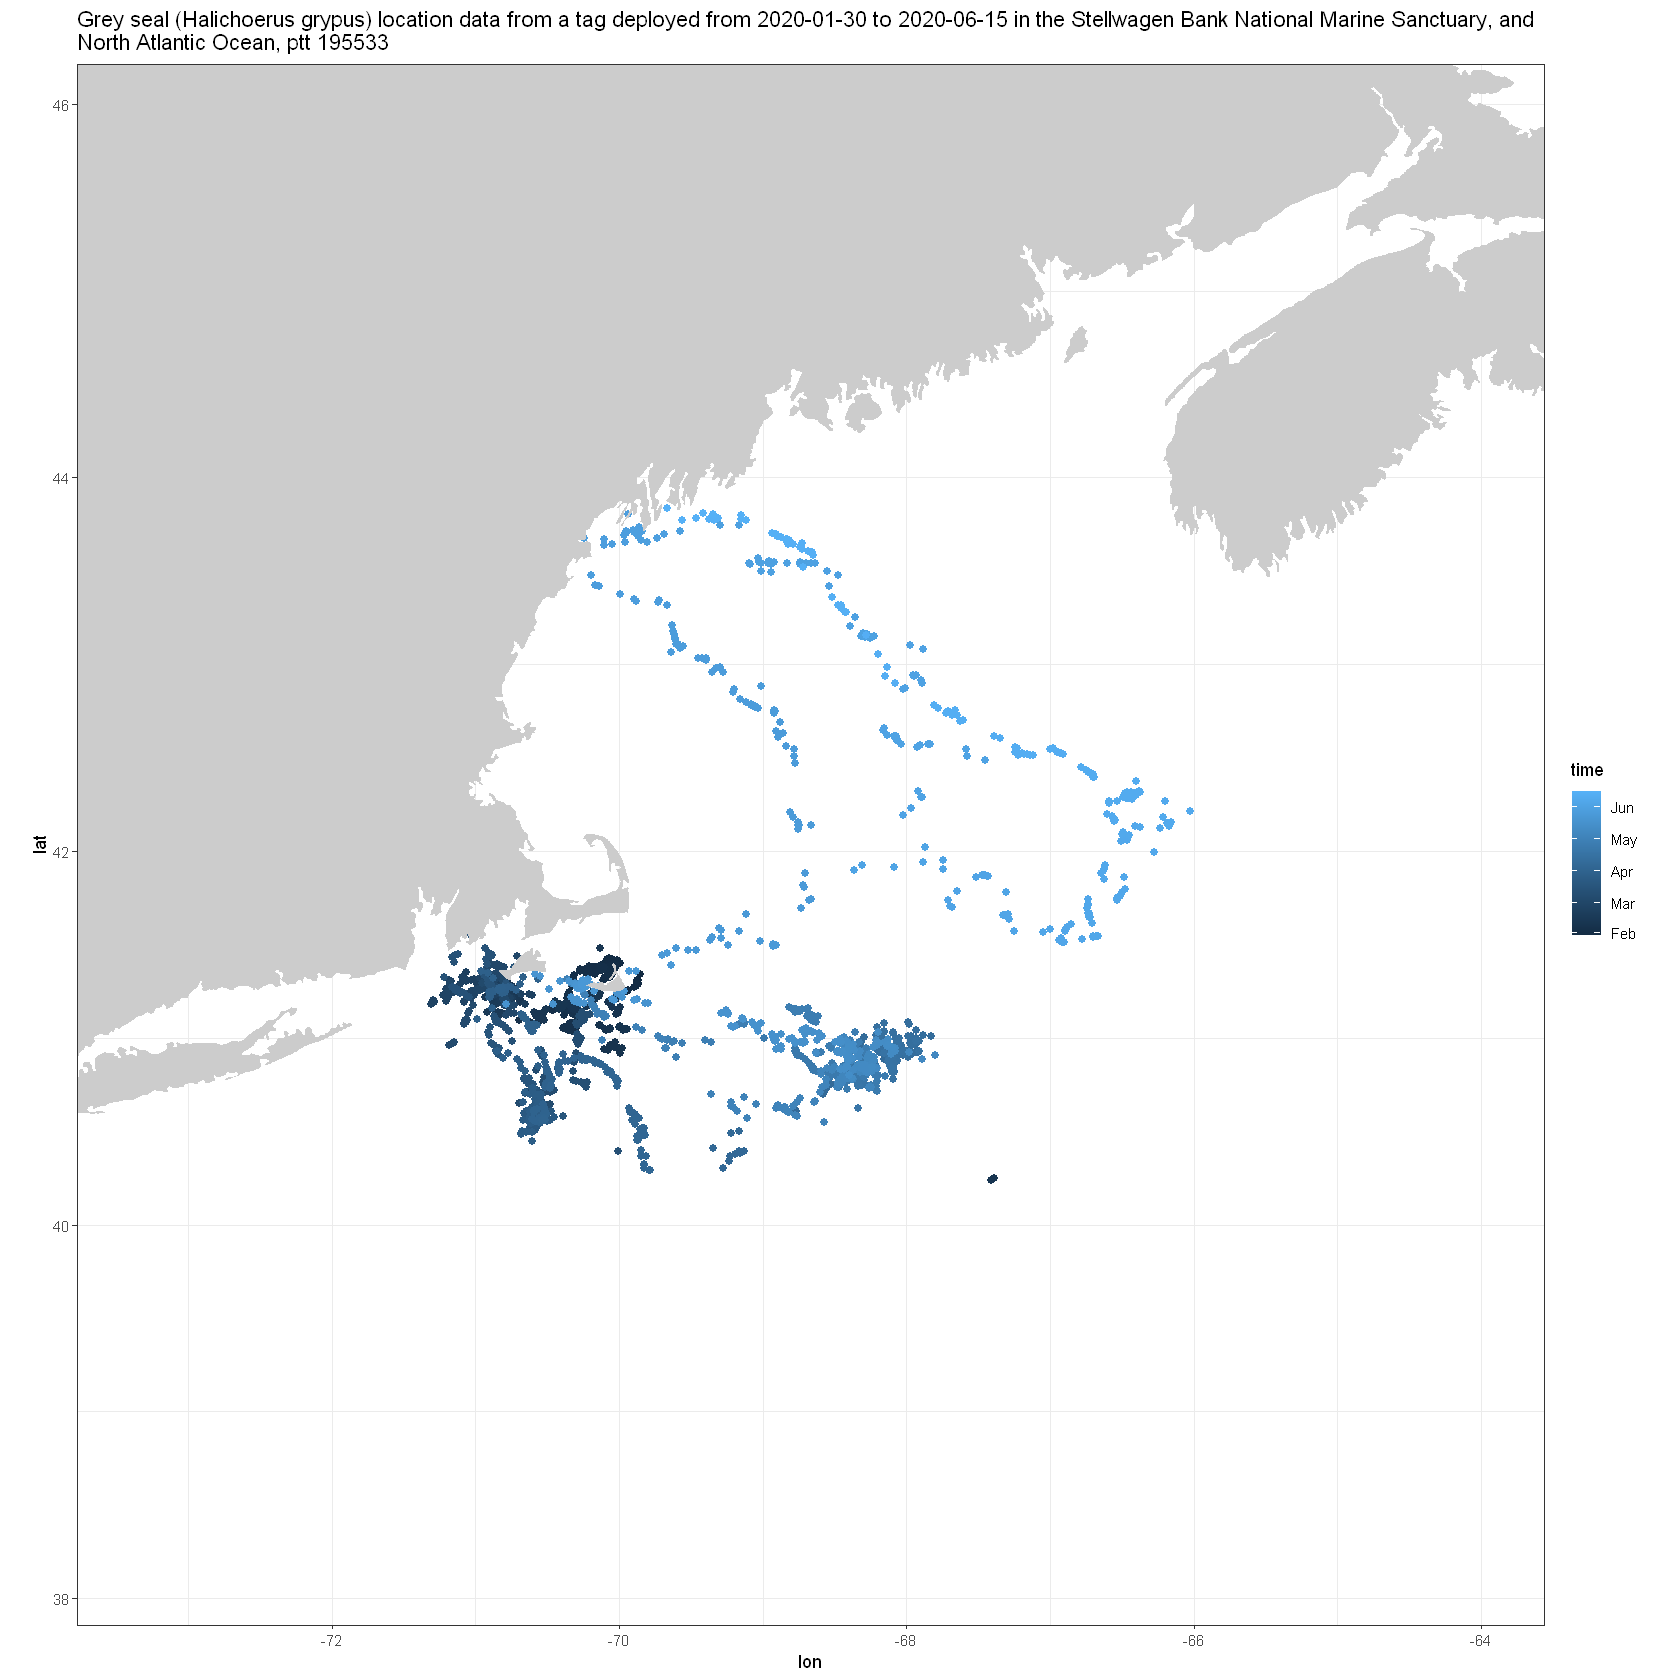

In [11]:
library('maps')
library('mapdata')

# collect title from global attributes
title <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "title")


# Map limits.
ylim <- c( min(atn_tbl$lat)-2, max(atn_tbl$lat)+2 )
xlim <- c( min(atn_tbl$lon)-2, max(atn_tbl$lon)+2 )

# Get outline data for map.
w <- map_data( 'worldHires', ylim = ylim, xlim = xlim )

z <- ggplot(atn_tbl, aes( x = lon, y = lat )) +
     geom_point( aes(colour = time), size = 2.0) +
     scale_shape_manual( values = c(19, 1) )

z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = 'grey80') + 
    theme_bw() +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    ggtitle( paste( strwrap(title$value, width = 150), collapse = "\n") )

In [12]:
min(atn_tbl$time)
max(atn_tbl$time)

[1] "2020-01-30 15:05:34 GMT"

[1] "2020-06-15 23:16:37 GMT"

---
# Converting to Darwin Core

Now let's work through converting this netCDF file to Darwin Core. Following the guidance published at https://github.com/tdwg/dwc-for-biologging/wiki/Data-guidelines.

Could also use this as a resource: https://github.com/ocean-tracking-network/biologging_standardization/tree/master/examples/braun-blueshark/darwincore-example

Mappings have already been done [here](https://docs.google.com/spreadsheets/d/12pP4IY2oXFhkXvOePtizHnShhlmO0r7QOTxu5ETvNOA/edit#gid=0).

## Event Core
Term | Status
-----|-------
eventID | Required
eventDate | Required
decimalLatitude & decimalLongitude | Required
geodeticDatum | Required
locationID | Strongly Recommended
maximumDepthInMeters & minimumDepthInMeters | Strongly Recommended
footprintWKT | Share if available
modified | Share if available

In [13]:
tag_id <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "ptt")
tag_id

id,name,variable,value
<int>,<chr>,<chr>,<named list>
7,ptt,NC_GLOBAL,195533


In [14]:
# for Event Core following: 
# https://github.com/tdwg/dwc-for-biologging/wiki/Data-guidelines#event-core

eventdf <- data.frame( atn_tbl$time, atn_tbl$lat, atn_tbl$lon, atn_tbl$z)

# eventID
# urn:catalog:[datacenter]:[institution]:[project shortcode]:[datacenter-specific-ID] 
# At OTN, the datacenter-specific ID is a combination of the animal's identifier, project affiliation, 
# and the date of release. e.g. urn:catalog:otn:DAL:NSBS:NSBS-Hops:20170722053000-release
#
# institution <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "institution")
# project_shortcode <- 'atn'
# datacenter_specific_ID <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "tag_id")
#
# id <- paste("urn:catalog:atn",institution$value,project_shortcode,datacenter_specific_ID$value, sep = ":")

uuid_tbl = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "uuid")
eventdf$eventID <- paste(uuid_tbl$value)

#eventDate
eventdf$eventDate <- format(eventdf$atn_tbl.time, '%Y-%m-%dT%H:%M:%SZ')
eventdf$atn_tbl.time <- NULL

#decimalLatitude
eventdf$decimalLatitude <- eventdf$atn_tbl.lat
eventdf$atn_tbl.lat <- NULL

#decimalLongitude
eventdf$decimalLongitude <- eventdf$atn_tbl.lon
eventdf$atn_tbl.lon <- NULL

#geodeticDatum
gd_tbl <- metadata %>% dplyr::filter(variable == "crs") %>% dplyr::filter(name == "epsg_code")
eventdf$geodeticDatum <- paste(gd_tbl$value)

#maximumDepth and minimumDepth
eventdf$minimumDepthInMeters <- eventdf$atn_tbl.z
eventdf$maximumDepthInMeters <- eventdf$atn_tbl.z
eventdf$atn_tbl.z <- NULL

#locationID
eventdf$locationID <- 'Release' # from https://github.com/tdwg/dwc-for-biologging/wiki/Acoustic-sensor-enabled-tracking-of-blue-sharks

#footprintWKT
ftprnt_tbl = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_bounds")
eventdf$footprintWKT <- paste(ftprnt_tbl$value)

#modified
mdfied_tbl <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "date_modified")
eventdf$modified <- paste(mdfied_tbl$value)

eventdf

eventID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,minimumDepthInMeters,maximumDepthInMeters,locationID,footprintWKT,modified
<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T15:05:34Z,41.3899,-70.0309,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T15:13:36Z,41.3972,-70.0302,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T15:31:26Z,41.3940,-70.0313,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T15:52:17Z,41.3995,-69.9917,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T21:22:54Z,41.3416,-69.8560,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T22:21:57Z,41.3103,-69.8707,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T22:21:57Z,41.3082,-69.8755,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-30T23:16:14Z,41.2992,-69.8729,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z
48291772-a7b1-48f0-a428-b0110f97f59e,2020-01-31T00:02:23Z,41.2904,-69.8699,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2021-08-12T20:02:21Z


In [15]:
file_name_event <- paste('atn_',tag_id$value,'_event.csv', sep = "")

write.csv(eventdf, file=file_name_event, row.names=FALSE, fileEncoding="UTF-8", quote=TRUE)

## Occurrence Core
Term | Status
-----|------
basisOfRecord | Required
occurrenceID | Required
organismID | Required
eventDate | Required
decimalLatitude & decimalLongitude | Required
geodeticDatum | Required
scientificName | Required
eventID | Strongly recommended
samplingProtocol | Strongly recommended
kingdom | Strongly recommended
taxonRank | Strongly recommended
coordinateUncertaintyInMeters | Share if available

In [16]:
# occurrence Core/Extension

occurrencedf <- data.frame( atn_tbl$time, atn_tbl$lat, atn_tbl$lon)

# basisOfRecord
occurrencedf$basisOfRecord <- 'machineObservation'

# organismID
# platformID + common name
common_name_tbl <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "common_name")
platform_id_tbl <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "platform_id")
occurrencedf$organismID <- paste(platform_id_tbl$value, common_name_tbl$value, sep = "_")

# eventDate
occurrencedf$eventDate <- format(occurrencedf$atn_tbl.time, '%Y-%m-%dT%H:%M:%SZ')
occurrencedf$atn_tbl.time <- NULL

# occurrenceID
rank_tbl <- metadata %>% dplyr::filter(variable == "animal") %>% dplyr::filter(name == "rank")
occurrencedf$occurrenceID <- paste(occurrencedf$eventDate, atn_tbl$z, rank_tbl$value, sep = "_")

#decimalLatitude
occurrencedf$decimalLatitude <- occurrencedf$atn_tbl.lat
occurrencedf$atn_tbl.lat <- NULL

#decimalLongitude
occurrencedf$decimalLongitude <- occurrencedf$atn_tbl.lon
occurrencedf$atn_tbl.lon <- NULL

# geodeticDatum
gd_tbl <- metadata %>% dplyr::filter(variable == "crs") %>% dplyr::filter(name == "epsg_code")
occurrencedf$geodeticDatum <- paste(gd_tbl$value)

# scientificName
occurrencedf$scientificName <- RNetCDF::var.get.nc(RNetCDF::open.nc("atn_trajectory_template.nc"), "taxon_name")

# scientificNameId
# value of taxon_lsid var
occurrencedf$scientificNameId <- RNetCDF::var.get.nc(RNetCDF::open.nc("atn_trajectory_template.nc"), "taxon_lsid")

# eventID
uuid_tbl = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "uuid")
occurrencedf$eventID <- paste(uuid_tbl$value)

# samplingProtocol
# don't have a mapping yet


# kingdom
kingdom_tbl <- metadata %>% dplyr::filter(variable == "animal") %>% dplyr::filter(name == "kingdom")
occurrencedf$kingdom <- paste(kingdom_tbl$value)

# taxonRank
occurrencedf$taxonRank <- paste(rank_tbl$value)

# coordinateUncertaintyInMeters
# take the larger of variable:error_radius AND variable:semi_major_axis
occurrencedf$coordinateUncertaintyInMeters <- pmax(atn_tbl$error_radius, atn_tbl$semi_major_axis, atn_tbl$semi_minor_axis, na.rm = TRUE)

occurrencedf

basisOfRecord,organismID,eventDate,occurrenceID,decimalLatitude,decimalLongitude,geodeticDatum,scientificName,scientificNameId,eventID,kingdom,taxonRank,coordinateUncertaintyInMeters
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T15:05:34Z,2020-01-30T15:05:34Z_0_Species,41.3899,-70.0309,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,NA
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T15:13:36Z,2020-01-30T15:13:36Z_0_Species,41.3972,-70.0302,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,987
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T15:31:26Z,2020-01-30T15:31:26Z_0_Species,41.3940,-70.0313,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,2521
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T15:52:17Z,2020-01-30T15:52:17Z_0_Species,41.3995,-69.9917,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,1340
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T21:22:54Z,2020-01-30T21:22:54Z_0_Species,41.3416,-69.8560,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,4412
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T22:21:57Z,2020-01-30T22:21:57Z_0_Species,41.3103,-69.8707,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,26005
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T22:21:57Z,2020-01-30T22:21:57Z_0_Species,41.3082,-69.8755,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,30080
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-30T23:16:14Z,2020-01-30T23:16:14Z_0_Species,41.2992,-69.8729,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,7885
machineObservation,5e32f4e46321be14905ea848_grey seal,2020-01-31T00:02:23Z,2020-01-31T00:02:23Z_0_Species,41.2904,-69.8699,EPSG:4326,Halichoerus grypus,urn:lsid:marinespecies.org:taxname:137080,48291772-a7b1-48f0-a428-b0110f97f59e,Animalia,Species,2543


In [17]:
file_name_occur <- paste('atn_',tag_id$value,'_occurrence.csv', sep = "")

write.csv(occurrencedf, file=file_name_occur, row.names=FALSE, fileEncoding="UTF-8", quote=TRUE)

## Measurement or Fact

Term | Status
-----|-----
occurrenceID | Required
measurementType | Required
measurementValue | Required
eventID	| Strongly Recommended
measurementUnit | Strongly Recommended
measurementMethod | Strongly Recommended
measurementTypeID | Strongly Recommended
measurementMethodID | Strongly Recommended
measurementUnitID | Strongly Recommended
measurementAccuracy | Share if available
measurementDeterminedDate | Share if available
measurementDeterminedBy | Share if available
measurementRemarks | Share if available
measurementValueID | Share if available

In [18]:
# Measurement or Fact extension

mofdf <- atn_tbl

# Initial checks

In [19]:
library(obistools)

In [20]:
report <- obistools::report(occurrencedf)
report

Warning message:
"`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


processing file: report.Rmd



  |..........                                                            |  14%
  ordinary text without R code

  |....................                                                  |  29%
label: unnamed-chunk-1 (with options) 
List of 2
 $ echo   : logi FALSE
 $ message: logi FALSE

  |..............................                                        |  43%
  ordinary text without R code

  |........................................                              |  57%
label: unnamed-chunk-2 (with options) 
List of 3
 $ echo   : logi FALSE
 $ results: chr "asis"
 $ message: logi FALSE

  |..................................................                    |  71%
  ordinary text without R code

  |............................................................          |  86%
label: unnamed-chunk-3 (with options) 
List of 3
 $ echo    : logi FALSE
 $ messages: logi FALSE
 $ warning : logi FALSE

  |......................................................................| 100%
  ordin

output file: report.knit.md




"C:/Users/MATHEW~1.BID/programs/ANACON~1/envs/IOOS/Library/bin/pandoc" +RTS -K512m -RTS report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc35a47cdb23a.html --lua-filter "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmarkdown\lua\pagebreak.lua" --lua-filter "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmarkdown\lua\latex-div.lua" --self-contained --variable bs3=TRUE --standalone --section-divs --template "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmd\h\default.html" --no-highlight --variable highlightjs=1 --variable theme=bootstrap --include-in-header "C:\Users\MATHEW~1.BID\AppData\Local\Temp\3\RtmpsTFgAW\rmarkdown-str35a4628960a1.html" --mathjax --variable "mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" 



Output created: C:/Users/Mathew.Biddle/AppData/Local/obistools/obistools/Cache/report.html



[1] "C:/Users/Mathew.Biddle/AppData/Local/obistools/obistools/Cache/report.html"

In [21]:
event_report <- obistools::report(eventdf)
event_report



processing file: report.Rmd



  |..........                                                            |  14%
  ordinary text without R code

  |....................                                                  |  29%
label: unnamed-chunk-1 (with options) 
List of 2
 $ echo   : logi FALSE
 $ message: logi FALSE

  |..............................                                        |  43%
  ordinary text without R code

  |........................................                              |  57%
label: unnamed-chunk-2 (with options) 
List of 3
 $ echo   : logi FALSE
 $ results: chr "asis"
 $ message: logi FALSE

  |..................................................                    |  71%
  ordinary text without R code

  |............................................................          |  86%
label: unnamed-chunk-3 (with options) 
List of 3
 $ echo    : logi FALSE
 $ messages: logi FALSE
 $ warning : logi FALSE

  |......................................................................| 100%
  ordin

output file: report.knit.md




"C:/Users/MATHEW~1.BID/programs/ANACON~1/envs/IOOS/Library/bin/pandoc" +RTS -K512m -RTS report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc35a479d9482d.html --lua-filter "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmarkdown\lua\pagebreak.lua" --lua-filter "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmarkdown\lua\latex-div.lua" --self-contained --variable bs3=TRUE --standalone --section-divs --template "C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\Lib\R\library\rmarkdown\rmd\h\default.html" --no-highlight --variable highlightjs=1 --variable theme=bootstrap --include-in-header "C:\Users\MATHEW~1.BID\AppData\Local\Temp\3\RtmpsTFgAW\rmarkdown-str35a43c96108f.html" --mathjax --variable "mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" 



Output created: C:/Users/Mathew.Biddle/AppData/Local/obistools/obistools/Cache/report.html



[1] "C:/Users/Mathew.Biddle/AppData/Local/obistools/obistools/Cache/report.html"

In [22]:
# report <- obistools::report(mofdf)
# report

## hmisc::describe

In [23]:
Hmisc::describe(occurrencedf)

occurrencedf 

 13  Variables      2216  Observations
--------------------------------------------------------------------------------
basisOfRecord 
                 n            missing           distinct              value 
              2216                  0                  1 machineObservation 
                             
Value      machineObservation
Frequency                2216
Proportion                  1
--------------------------------------------------------------------------------
organismID 
                                 n                            missing 
                              2216                                  0 
                          distinct                              value 
                                 1 5e32f4e46321be14905ea848_grey seal 
                                             
Value      5e32f4e46321be14905ea848_grey seal
Frequency                                2216
Proportion                                  1
---------------

## Now let's create some metadata
Using the R package [EML](https://docs.ropensci.org/EML/) we can create the EML metadata to associate with the data above.

https://github.com/gbif/ipt/wiki/GMPHowToGuide
Also, https://github.com/gbif/ipt/wiki/GMPHowToGuide#dataset-resource

In [24]:
library(EML)

In [25]:
me <- list(individualName = list(givenName = "Matt", surName = "Biddle"))
my_eml <- list(dataset = list(
              title = "A Minimal Valid EML Dataset",
              creator = me,
              contact = me)
            )

In [26]:
me

$individualName
$individualName$givenName
[1] "Matt"

$individualName$surName
[1] "Biddle"

In [27]:
format(Sys.time(),'%Y-%m-%dT%H:%M:%SZ')

[1] "2022-03-15T16:39:51Z"

In [28]:
geographicDescription <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "sea_name")
west <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lon_min")
east <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lon_max")
north <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lat_max")
south <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lat_min")
altitudeMin <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_min")
altitudeMax <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_max")
altitudeUnits <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_units")

coverage <- 
  set_coverage(begin = format(min(atn_tbl$time),'%Y-%m-%d'), end = format(max(atn_tbl$time), '%Y-%m-%d'),
               sci_names = RNetCDF::var.get.nc(RNetCDF::open.nc("atn_trajectory_template.nc"), "taxon_name"),
               geographicDescription = paste(geographicDescription$value),
               west = paste(west$value), 
               east = paste(east$value) , 
               north = paste(north$value) , 
               south = paste(south$value) ,
               altitudeMin = paste(altitudeMin$value), 
               altitudeMaximum = paste(altitudeMax$value),
               altitudeUnits = ifelse (paste(altitudeUnits$value) == 'm', "meter", "?"))

In [29]:
creator_name <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_name")
creator_email <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_email")
creator_sector <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_sector")
creator <- eml$creator(
            eml$individualName(
                givenName = paste(creator_name$value),
                surName = paste(creator_name$value)
                ),
            position = paste(creator_sector$value),
            electronicMailAddress = paste(creator_email$value)
            )

In [30]:
#contact_name = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contact_name")
contact <- eml$contact(
            eml$individualName(
            givenName = paste(creator_name$value),
            surName = paste(creator_name$value)),
            position = paste(creator_sector$value),
            electronicMailAddress = paste(creator_email$value)
            )

In [31]:
#metadata_name
metadataProvider <- eml$metadataProvider(
            eml$individualName(
                givenName = paste(creator_name$value),
                surName = paste(creator_name$value)),
            position = paste(creator_sector$value),
            electronicMailAddress = paste(creator_email$value)
            )



In [32]:
## these are the entries in contributor, need to iterate since comma separated list.
contrib_name <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_name")
contrib_position <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_role")
contrib_email <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_email")

In [33]:
associatedParty <- eml$associatedParty(
                    eml$individualName(
                    givenName = paste(contrib_name$value),
                    surName = paste(contrib_name$value)),
                    position = paste(contrib_position$value),
                    electronicMailAddress = paste(contrib_email$value)
                    )

In [34]:
abstract <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "summary")

In [35]:
# keywords
keywords <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "keywords")
kw_vocab <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "keywords_vocabulary")
keywordSet <- list(
    list(
        keywordThesaurus = kw_vocab$value$keywords_vocabulary,
        keyword = as.list(strsplit(keywords$value$keywords, ", "))
        ))

In [36]:
methods <- "NEED TO MAP FROM NCFILE"

In [37]:
license <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "license")

In [38]:
license$value

$license
[1] "WE'RE STILL WAITING TO HEAR WHICH LICENSE WE CAN USE FOR THESE DATA"

Now build the eml file.

In [39]:
library(uuid)

physical <- set_physical(file_name_occur)

# attributeList <- 
#   set_attributes(attributes, 
#                  factors, 
#                  col_classes = c("character", 
#                                  "Date",
#                                  "Date",
#                                  "Date",
#                                  "factor",
#                                  "factor",
#                                  "factor",
#                                  "numeric"))

my_eml <- eml$eml(
           packageId = paste(uuid_tbl$value),  
           system = "uuid",
           dataset = eml$dataset(
               alternateIdentifier = UUIDgenerate(use.time = TRUE),
               title = title$value,
               creator = creator,
               metadataProvider = metadataProvider,
               #associatedParty = associatedParty,
               contact = contact,
               pubDate = format(Sys.time(),'%Y-%m-%d'),
               language = "English",
               intellectualRights = eml$intellectualRights(
                                    para = paste(license$value),
                                                           ),
               abstract = eml$abstract(
                               para = abstract$value$summary,
                                       ),
               keywordSet = keywordSet,
               coverage = coverage,
               license = eml$license(
                           licenseName = paste(license$value),
                           ),
               #dataTable = eml$dataTable(
               #  entityName = file_name_occur,
               #  entityDescription = "Occurrences",
               #  physical = physical)
               ))

Automatically calculated file size using file.size("atn_195533_occurrence.csv")

Automatically calculated authentication size using digest::digest("atn_195533_occurrence.csv", algo = "md5", file = TRUE)



In [40]:
my_eml

$access
list()

$dataset
$dataset$alternateIdentifier
[1] "10685464-a4a0-11ec-8000-f77f7286d4dc"

$dataset$shortName
NULL

$dataset$title
$dataset$title$title
[1] "Grey seal (Halichoerus grypus) location data from a tag deployed from 2020-01-30 to 2020-06-15 in the Stellwagen Bank National Marine Sanctuary, and North Atlantic Ocean, ptt 195533"


$dataset$creator
$dataset$creator$individualName
$dataset$creator$individualName$salutation
list()

$dataset$creator$individualName$givenName
[1] "Kimberly Murray"

$dataset$creator$individualName$surName
[1] "Kimberly Murray"


$dataset$creator$organizationName
list()

$dataset$creator$positionName
[1] ""

$dataset$creator$address
list()

$dataset$creator$phone
NULL

$dataset$creator$electronicMailAddress
[1] "kimberly.murray@noaa.gov"

$dataset$creator$onlineUrl
NULL

$dataset$creator$userId
NULL

$dataset$creator$references
NULL

$dataset$creator$id
NULL

$dataset$creator$system
NULL

$dataset$creator$scope
NULL


$dataset$metadataProvider
$dataset$metadataProvider$individualName
$dataset$metadataProvider$individualName$salutation
list()

$dataset$metadataProvider$individualName$givenName
[1] "Kimberly Murray"

$dataset$metadataProvider$individualName$surName
[1] "Kimberly Murray"


$dataset$metadataProvider$organizationName
list()

$dataset$metadataProvider$positionName
[1] ""

$dataset$metadataProvider$address
list()

$dataset$metadataProvider$phone
NULL

$dataset$metadataProvider$electronicMailAddress
[1] "kimberly.murray@noaa.gov"

$dataset$metadataProvider$onlineUrl
NULL

$dataset$metadataProvider$userId
NULL

$dataset$metadataProvider$references
NULL

$dataset$metadataProvider$id
NULL

$dataset$metadataProvider$system
NULL

$dataset$metadataProvider$scope
NULL


$dataset$associatedParty
list()

$dataset$pubDate
[1] "2022-03-15"

$dataset$language
[1] "English"

$dataset$series
NULL

$dataset$abstract
$dataset$abstract$section
list()

$dataset$abstract$para
[1] "Wildlife Computers SPOT293 tag deployed on a Grey seal (Halichoerus grypus) by Kimberly Murray in Stellwagen Bank National Marine Sanctuary, and North Atlantic Ocean from 2020-01-30 to 2020-06-15. PTT tag number 195533."

$dataset$abstract$markdown
NULL

$dataset$abstract$lang
NULL


$dataset$keywordSet
$dataset$keywordSet[[1]]
$dataset$keywordSet[[1]]$keywordThesaurus
[1] "None"

$dataset$keywordSet[[1]]$keyword
$dataset$keywordSet[[1]]$keyword[[1]]
[1] "animal telemetry network"          "ATN"                              
[3] "IOOS"                              "Integrated Ocean Observing System"
[5] "trajectory"                        "gray seal"                        
[7] "Halichoerus grypus"                "Spot 6 "                          




$dataset$additionalInfo
list()

$dataset$intellectualRights
$dataset$intellectualRights$section
list()

$dataset$intellectualRights$para
[1] "WE'RE STILL WAITING TO HEAR WHICH LICENSE WE CAN USE FOR THESE DATA"

$dataset$intellectualRights$markdown
NULL

$dataset$intellectualRights$lang
NULL


$dataset$licensed
$dataset$licensed$licenseName
[1] "WE'RE STILL WAITING TO HEAR WHICH LICENSE WE CAN USE FOR THESE DATA"

$dataset$licensed$url
NULL

$dataset$licensed$identifier
NULL


$dataset$distribution
list()

$dataset$coverage
geographicCoverage:
  geographicDescription: Stellwagen Bank National Marine Sanctuary, and North Atlantic
    Ocean
  boundingCoordinates:
    westBoundingCoordinate: '-71.3079'
    eastBoundingCoordinate: '-66.0281'
    northBoundingCoordinate: '43.8355'
    southBoundingCoordinate: '40.2363'
    boundingAltitudes:
      altitudeMinimum: '0'
      altitudeMaximum: '0'
      altitudeUnits: meter
taxonomicCoverage:
  taxonomicClassification:
  - taxonRankName: Genus
    taxonRankValue: Halichoerus
    taxonomicClassification:
      taxonRankName: Species
      taxonRankValue: grypus
temporalCoverage:
  rangeOfDates:
    beginDate:
      calendarDate: '2020-01-30'
    endDate:
      calendarDate: '2020-06-15'

$dataset$annotation
list()

$dataset$purpo

Validate EML

In [41]:
val <- eml_validate(my_eml)
attr(val,"errors")

character(0)

Write eml to file.

In [42]:
file_name_eml <- paste('atn_',tag_id$value,'_eml.xml', sep = "")
write_eml(my_eml, file_name_eml)

Raw EML

In [43]:
metadata %>% dplyr::filter(variable == "NC_GLOBAL")

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,date_created,NC_GLOBAL,2021-08-12T20:02:21Z
1,featureType,NC_GLOBAL,trajectory
2,cdm_data_type,NC_GLOBAL,Trajectory
3,Conventions,NC_GLOBAL,"CF-1.6, ACDD-1.3"
4,argos_program_number,NC_GLOBAL,16584
5,creator_email,NC_GLOBAL,kimberly.murray@noaa.gov
6,id,NC_GLOBAL,5e32f4e46321be14905ea848
7,ptt,NC_GLOBAL,195533
8,source,NC_GLOBAL,Service Argos


In [44]:
my_eml

$access
list()

$dataset
$dataset$alternateIdentifier
[1] "10685464-a4a0-11ec-8000-f77f7286d4dc"

$dataset$shortName
NULL

$dataset$title
$dataset$title$title
[1] "Grey seal (Halichoerus grypus) location data from a tag deployed from 2020-01-30 to 2020-06-15 in the Stellwagen Bank National Marine Sanctuary, and North Atlantic Ocean, ptt 195533"


$dataset$creator
$dataset$creator$individualName
$dataset$creator$individualName$salutation
list()

$dataset$creator$individualName$givenName
[1] "Kimberly Murray"

$dataset$creator$individualName$surName
[1] "Kimberly Murray"


$dataset$creator$organizationName
list()

$dataset$creator$positionName
[1] ""

$dataset$creator$address
list()

$dataset$creator$phone
NULL

$dataset$creator$electronicMailAddress
[1] "kimberly.murray@noaa.gov"

$dataset$creator$onlineUrl
NULL

$dataset$creator$userId
NULL

$dataset$creator$references
NULL

$dataset$creator$id
NULL

$dataset$creator$system
NULL

$dataset$creator$scope
NULL


$dataset$metadataProvider
$dataset$metadataProvider$individualName
$dataset$metadataProvider$individualName$salutation
list()

$dataset$metadataProvider$individualName$givenName
[1] "Kimberly Murray"

$dataset$metadataProvider$individualName$surName
[1] "Kimberly Murray"


$dataset$metadataProvider$organizationName
list()

$dataset$metadataProvider$positionName
[1] ""

$dataset$metadataProvider$address
list()

$dataset$metadataProvider$phone
NULL

$dataset$metadataProvider$electronicMailAddress
[1] "kimberly.murray@noaa.gov"

$dataset$metadataProvider$onlineUrl
NULL

$dataset$metadataProvider$userId
NULL

$dataset$metadataProvider$references
NULL

$dataset$metadataProvider$id
NULL

$dataset$metadataProvider$system
NULL

$dataset$metadataProvider$scope
NULL


$dataset$associatedParty
list()

$dataset$pubDate
[1] "2022-03-15"

$dataset$language
[1] "English"

$dataset$series
NULL

$dataset$abstract
$dataset$abstract$section
list()

$dataset$abstract$para
[1] "Wildlife Computers SPOT293 tag deployed on a Grey seal (Halichoerus grypus) by Kimberly Murray in Stellwagen Bank National Marine Sanctuary, and North Atlantic Ocean from 2020-01-30 to 2020-06-15. PTT tag number 195533."

$dataset$abstract$markdown
NULL

$dataset$abstract$lang
NULL


$dataset$keywordSet
$dataset$keywordSet[[1]]
$dataset$keywordSet[[1]]$keywordThesaurus
[1] "None"

$dataset$keywordSet[[1]]$keyword
$dataset$keywordSet[[1]]$keyword[[1]]
[1] "animal telemetry network"          "ATN"                              
[3] "IOOS"                              "Integrated Ocean Observing System"
[5] "trajectory"                        "gray seal"                        
[7] "Halichoerus grypus"                "Spot 6 "                          




$dataset$additionalInfo
list()

$dataset$intellectualRights
$dataset$intellectualRights$section
list()

$dataset$intellectualRights$para
[1] "WE'RE STILL WAITING TO HEAR WHICH LICENSE WE CAN USE FOR THESE DATA"

$dataset$intellectualRights$markdown
NULL

$dataset$intellectualRights$lang
NULL


$dataset$licensed
$dataset$licensed$licenseName
[1] "WE'RE STILL WAITING TO HEAR WHICH LICENSE WE CAN USE FOR THESE DATA"

$dataset$licensed$url
NULL

$dataset$licensed$identifier
NULL


$dataset$distribution
list()

$dataset$coverage
geographicCoverage:
  geographicDescription: Stellwagen Bank National Marine Sanctuary, and North Atlantic
    Ocean
  boundingCoordinates:
    westBoundingCoordinate: '-71.3079'
    eastBoundingCoordinate: '-66.0281'
    northBoundingCoordinate: '43.8355'
    southBoundingCoordinate: '40.2363'
    boundingAltitudes:
      altitudeMinimum: '0'
      altitudeMaximum: '0'
      altitudeUnits: meter
taxonomicCoverage:
  taxonomicClassification:
  - taxonRankName: Genus
    taxonRankValue: Halichoerus
    taxonomicClassification:
      taxonRankName: Species
      taxonRankValue: grypus
temporalCoverage:
  rangeOfDates:
    beginDate:
      calendarDate: '2020-01-30'
    endDate:
      calendarDate: '2020-06-15'

$dataset$annotation
list()

$dataset$purpo

# Create meta.xml

Below is an example of the contents of meta.xml:

```
<archive xmlns="http://rs.tdwg.org/dwc/text/" metadata="eml.xml">
  <core encoding="UTF-8" fieldsTerminatedBy="\t" linesTerminatedBy="\n" fieldsEnclosedBy="" ignoreHeaderLines="1" rowType="http://rs.tdwg.org/dwc/terms/Occurrence">
    <files>
      <location>occurrence.txt</location>
    </files>
    <id index="0" />
    <field index="1" term="http://rs.tdwg.org/dwc/terms/datasetID"/>
    <field index="2" term="http://rs.tdwg.org/dwc/terms/institutionCode"/>
    <field index="3" term="http://rs.tdwg.org/dwc/terms/collectionCode"/>
    <field index="4" term="http://rs.tdwg.org/dwc/terms/basisOfRecord"/>
    <field index="5" term="http://rs.tdwg.org/dwc/terms/occurrenceID"/>
    <field index="6" term="http://rs.tdwg.org/dwc/terms/catalogNumber"/>
    <field index="7" term="http://rs.tdwg.org/dwc/terms/occurrenceRemarks"/>
    <field index="8" term="http://rs.tdwg.org/dwc/terms/individualCount"/>
    <field index="9" term="http://rs.tdwg.org/dwc/terms/sex"/>
    <field index="10" term="http://rs.tdwg.org/dwc/terms/occurrenceStatus"/>
    <field index="11" term="http://rs.tdwg.org/dwc/terms/eventDate"/>
    <field index="12" term="http://rs.tdwg.org/dwc/terms/year"/>
    <field index="13" term="http://rs.tdwg.org/dwc/terms/decimalLatitude"/>
    <field index="14" term="http://rs.tdwg.org/dwc/terms/decimalLongitude"/>
    <field index="15" term="http://rs.tdwg.org/dwc/terms/coordinateUncertaintyInMeters"/>
    <field index="16" term="http://rs.tdwg.org/dwc/terms/scientificNameID"/>
    <field index="17" term="http://rs.tdwg.org/dwc/terms/scientificName"/>
  </core>
  <extension encoding="UTF-8" fieldsTerminatedBy="\t" linesTerminatedBy="\n" fieldsEnclosedBy="" ignoreHeaderLines="1" rowType="http://rs.iobis.org/obis/terms/ExtendedMeasurementOrFact">
    <files>
      <location>extendedmeasurementorfact.txt</location>
    </files>
    <coreid index="0" />
    <field index="1" term="http://rs.tdwg.org/dwc/terms/occurrenceID"/>
    <field index="2" term="http://rs.tdwg.org/dwc/terms/measurementType"/>
    <field index="3" term="http://rs.tdwg.org/dwc/terms/measurementValue"/>
    <field index="4" term="http://rs.tdwg.org/dwc/terms/measurementUnit"/>
    <field index="5" term="http://rs.iobis.org/obis/terms/measurementUnitID"/>
    <field index="6" term="http://rs.tdwg.org/dwc/terms/measurementDeterminedDate"/>
  </extension>
</archive>
```

Checkout [XML package for R](https://cran.r-project.org/web/packages/XML/index.html).

`conda install -c conda-forge r-xml`

Another example in this [github repository](https://github.com/EDIorg/ecocomDP/blob/372c293c9e597c64db22c027debe18528d44f53b/inst/extdata/dwca_event_core/meta.xml).

Or use the [gui here](http://tools.gbif.org/dwca-assistant/) to create meta.xml.

In [45]:
file_name_occur
file_name_event
file_name_eml

[1] "atn_195533_occurrence.csv"

[1] "atn_195533_event.csv"

[1] "atn_195533_eml.xml"

In [46]:
colnames(occurrencedf)
colnames(eventdf)

[1] "basisOfRecord"                 "organismID"                   
 [3] "eventDate"                     "occurrenceID"                 
 [5] "decimalLatitude"               "decimalLongitude"             
 [7] "geodeticDatum"                 "scientificName"               
 [9] "scientificNameId"              "eventID"                      
[11] "kingdom"                       "taxonRank"                    
[13] "coordinateUncertaintyInMeters"

[1] "eventID"              "eventDate"            "decimalLatitude"     
 [4] "decimalLongitude"     "geodeticDatum"        "minimumDepthInMeters"
 [7] "maximumDepthInMeters" "locationID"           "footprintWKT"        
[10] "modified"

In [50]:
library(XML)

doc = newXMLDoc()
archiveNode = newXMLNode("archive",namespace=c(xmlns="http://rs.tdwg.org/dwc/text/"), attrs = c(metadata=file_name_eml),doc = doc)

## For the core occurrence
coreNode = newXMLNode("core", attrs = c(encoding="UTF-8", linesTerminatedBy="\\r\\n", fieldsTerminatedBy=",", fieldsEnclosedBy='&quot;', ignoreHeaderLines="1", rowType="http://rs.tdwg.org/dwc/terms/Occurrence"), parent = archiveNode)
filesNode = newXMLNode("files", parent = coreNode)
locationNode = newXMLNode("location", file_name_occur, parent = filesNode)
idnode = newXMLNode("id", attrs = c(index="9"), parent = coreNode)

# iterate over the columns in occurrence file to create field elements
i=0
for (col in colnames(occurrencedf))
    {
    termstr = paste("http://rs.tdwg.org/dwc/terms/",col, sep="")
    i=i+1
    fieldnode = newXMLNode("field", attrs = c(index=i, term=termstr), parent=coreNode)
}


## for the extensions
extensionNode = newXMLNode("extension", attrs = c(encoding="UTF-8", linesTerminatedBy="\\r\\n", fieldsTerminatedBy=",", fieldsEnclosedBy='&quot;', ignoreHeaderLines="1", rowType="http://rs.tdwg.org/dwc/terms/Event"), parent = archiveNode)
filesNode = newXMLNode("files", parent = extensionNode)
locationNode = newXMLNode("location", file_name_event, parent = filesNode)
idnode = newXMLNode("id", attrs = c(index="0"), parent = extensionNode)

# iterate over the columns in occurrence file to create field elements
i=0
for (col in colnames(eventdf))
    {
    if (col == 'modified'){
        termstr = paste("http://purl.org/dc/terms/", col, sep="")
    } else {
        termstr = paste("http://rs.tdwg.org/dwc/terms/",col, sep="")
        }
    
    i=i+1
    
    fieldnode = newXMLNode("field", attrs = c(index=i, term=termstr), parent=extensionNode)
}


print(doc)


saveXML(doc, file="meta.xml")

<?xml version="1.0"?>
<archive xmlns:xmlns="http://rs.tdwg.org/dwc/text/" metadata="atn_195533_eml.xml">
  <core encoding="UTF-8" linesTerminatedBy="\r\n" fieldsTerminatedBy="," fieldsEnclosedBy="&amp;quot;" ignoreHeaderLines="1" rowType="http://rs.tdwg.org/dwc/terms/Occurrence">
    <files>
      <location>atn_195533_occurrence.csv</location>
    </files>
    <id index="9"/>
    <field index="1" term="http://rs.tdwg.org/dwc/terms/basisOfRecord"/>
    <field index="2" term="http://rs.tdwg.org/dwc/terms/organismID"/>
    <field index="3" term="http://rs.tdwg.org/dwc/terms/eventDate"/>
    <field index="4" term="http://rs.tdwg.org/dwc/terms/occurrenceID"/>
    <field index="5" term="http://rs.tdwg.org/dwc/terms/decimalLatitude"/>
    <field index="6" term="http://rs.tdwg.org/dwc/terms/decimalLongitude"/>
    <field index="7" term="http://rs.tdwg.org/dwc/terms/geodeticDatum"/>
    <field index="8" term="http://rs.tdwg.org/dwc/terms/scientificName"/>
    <field index="9" term="http://rs.td

[1] "meta.xml"

# Build the DarwinCore-Archive zip package

In [51]:
library(zip)

files = c(file_name_occur, file_name_event, file_name_eml, "meta.xml")
zip::zip(
    "atn.zip",
    files,
    root = ".",
    mode = "mirror",
)

zip_list("atn.zip")

filename,compressed_size,uncompressed_size,timestamp,permissions,crc32,offset
<chr>,<dbl>,<dbl>,<dttm>,<octmode>,<hexmode>,<dbl>
atn_195533_occurrence.csv,43336,607049,2022-03-15 20:39:34,600,1a5250fc,0
atn_195533_event.csv,30556,956977,2022-03-15 20:39:32,600,4ef3b080,43407
atn_195533_eml.xml,1204,3967,2022-03-15 20:39:52,600,dd2309ed,74029
meta.xml,537,2403,2022-03-15 20:40:02,600,5ed6768a,75297
